The Aim of this Model is to find and predict the survival of the passenger during the titanic disaster

First Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas is used for reading and manipulating the dataset

numpy is used for numerical computaions and data preprocessing

seaborn for plotting the graphs for analysis

reading the Dataset

In [2]:
df=pd.read_csv('/content/Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


passangerId->id of the particular passanger

survived->whether the person survives the disaster or not

pclass->it tells us the passanger class 1 for first class, 2 for second class, 3 for third class

name->name of the passanger

sex->male or female or other genders

Age ->age of the particularr passanger

sibsp->siblings or spouse(husband or wife)

parch->it indicates that how many parents or childrens a passanger had with them on the titanic 0 for no parents or childerns,1 for 1 parents or childrens

Ticket->Ticket number

fare->ticket price paid by the passanger

cabin->cabin number assigned to the passanger

embarked->where the passanger boarded the titanic



head function is used for readi ng the top 5 rows in the dataset

Now checking for sme null values and info for understanding the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


identifier feature->passangerId


categorical features ->Name,Sex,Ticket,Cabin,Embarked

Numerical features->PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


we are having 86 null values in age column and

327 null values in cabin column

now we need to fill the null values with some statistics methods the most common ones are mean median mode

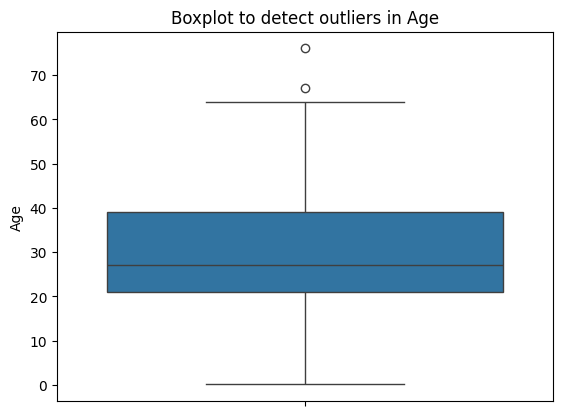

In [6]:
sns.boxplot(df['Age'])
plt.title('Boxplot to detect outliers in Age')
plt.show()

since age is defined as a float datatype we need to convert it into int datatype

In [9]:
df['Age']=df['Age'].astype(int)

we are using boxplot in order  to find out if the column has any outliers

since it has outliers we can use median to handle the missing values

In [8]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


 we handled the missing values in the age column now we having cabin column to handle the null val

 since cabin has almost 80% of missing values filling the missing valuew with some other methods may lead to less accuracy so dropping the column is the good way

In [11]:
df.drop('Cabin',axis=1,inplace=True)

Again mode is using to handle the reamaing missing values in fare column

In [12]:
Fare=df['Fare'].mode()[0]
df['Fare'].fillna(Fare,inplace=True)

<ipython-input-12-bbf547e7d3d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(Fare,inplace=True)


In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


now we having 0 missing values as it it good for further processeces like analysis and data preprocessing

Analysing the Dataset by using Graphs

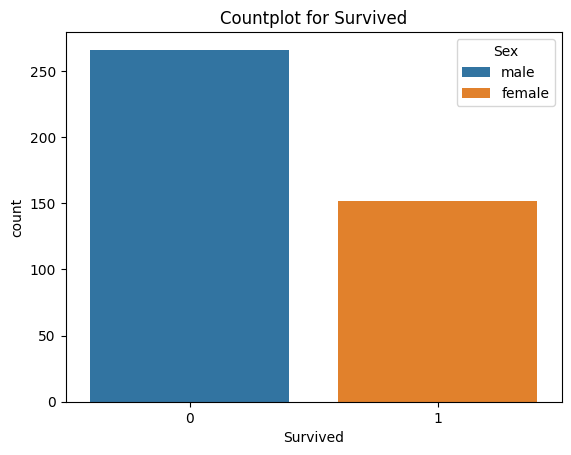

In [14]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Countplot for Survived')
plt.show()

0-> Dead

1->ALive

By the use of countplot we can able to identify that mostly males are dead during the disaster

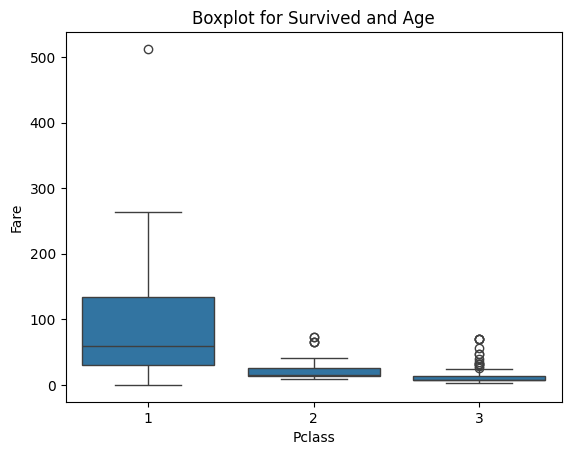

In [15]:
sns.boxplot(x='Pclass',y='Fare',data=df)
plt.title('Boxplot for Survived and Age')
plt.show()

the fare of the p1 class is higher than other classes

now we create a age group column to categorize the age for detailed analysis

In [16]:
df['Age_Group']=pd.cut(df['Age'],bins=5,labels=['0-10','10-20','20-30','30-40','40-50'])

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,20-30
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,30-40
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,40-50
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,10-20
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,10-20


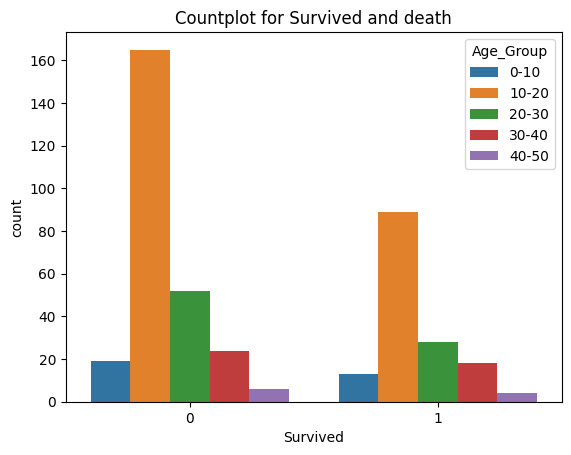

In [18]:
sns.countplot(x='Survived',hue='Age_Group',data=df)
plt.title('Countplot for Survived and death')
plt.show()

 by this we can understand that age of 10-20 has been mostly attacked by the disaster

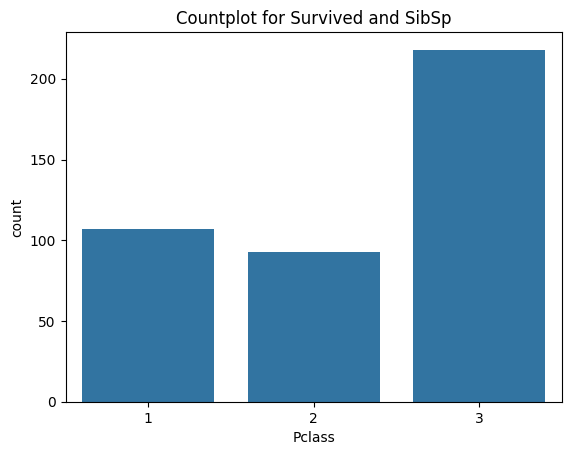

In [19]:
sns.countplot(x='Pclass',data=df)
plt.title('Countplot for Survived and SibSp')
plt.show()

the passangers are mostly in the third class

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


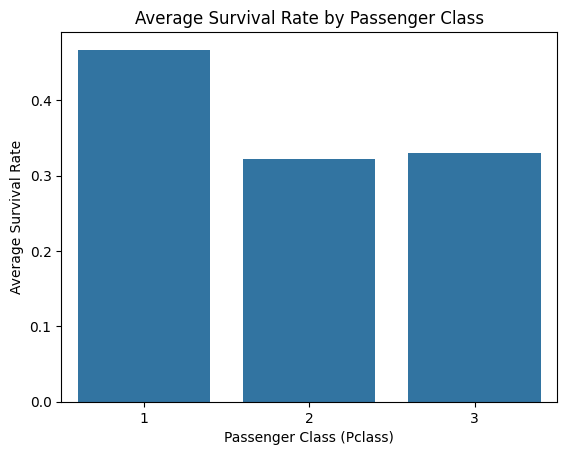

In [20]:
# Calculate average survival rate for each Pclass
avg_survival_by_pclass = df.groupby('Pclass')['Survived'].mean()


print(avg_survival_by_pclass)


sns.barplot(x=avg_survival_by_pclass.index, y=avg_survival_by_pclass.values)
plt.title('Average Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Survival Rate')
plt.show()

taking the avg survival of each p class

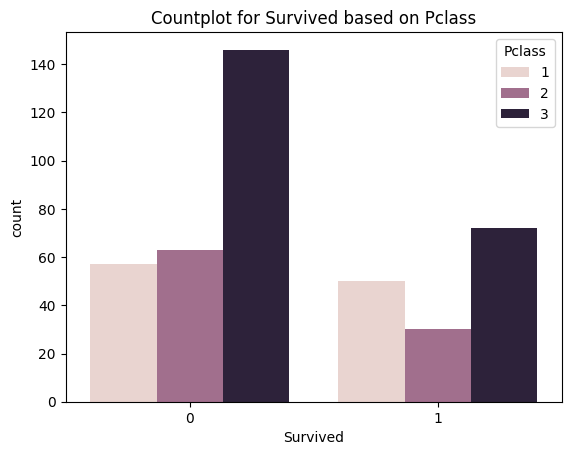

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Countplot for Survived based on Pclass')
plt.show()



the passangers who have been in the third class have been mostly attacked by the  disaster

Age_Group
0-10     0.406250
10-20    0.350394
20-30    0.350000
30-40    0.428571
40-50    0.400000
Name: Survived, dtype: float64


<ipython-input-22-d46dda93b677>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_survival_by_Age = df.groupby('Age_Group')['Survived'].mean()


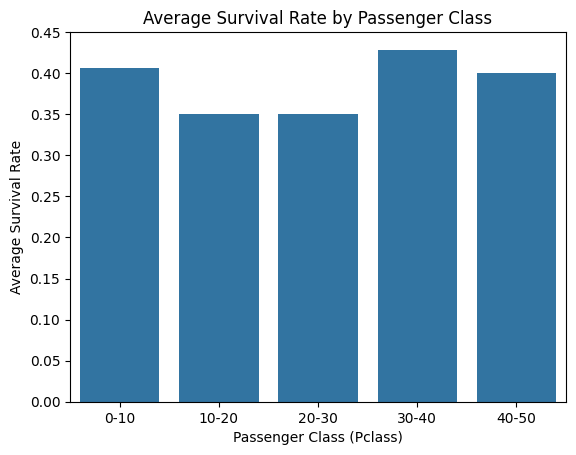

In [22]:


# Calculate average survival rate for each Pclass
avg_survival_by_Age = df.groupby('Age_Group')['Survived'].mean()

# Print the average survival rates
print(avg_survival_by_Age)

# Visualize the average survival rates using a bar plot
sns.barplot(x=avg_survival_by_Age.index, y=avg_survival_by_Age.values)
plt.title('Average Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Survival Rate')
plt.show()

Average survival rate of the passangers based on the age

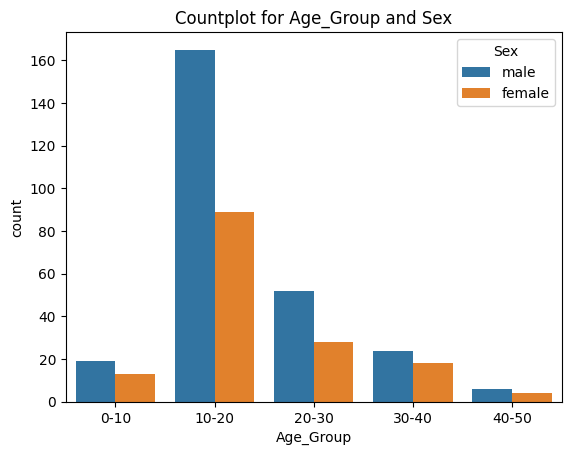

In [23]:
sns.countplot(x='Age_Group',hue='Sex',data=df)
plt.title('Countplot for Age_Group and Sex')
plt.show()

Age of 10-20 passangers are mostly travelled in the Ship

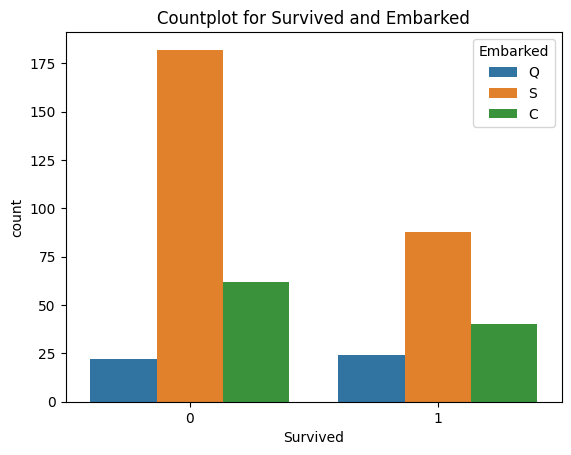

In [24]:
sns.countplot(x='Survived',hue='Embarked',data=df)
plt.title('Countplot for Survived and Embarked')
plt.show()

the passangers boarded from S(Southampton) has been mostly attacked by the disaster

Q<C<S

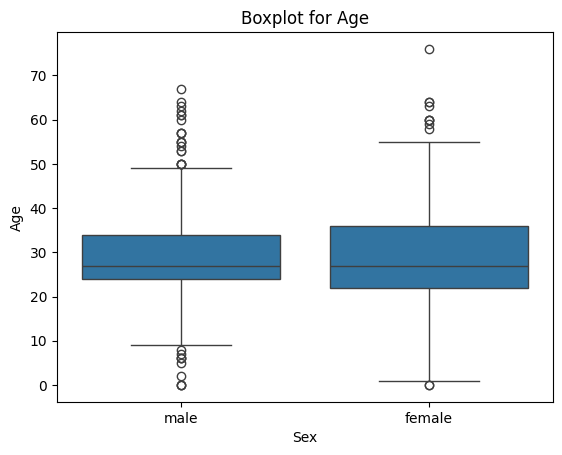

In [25]:
sns.boxplot(x='Sex',y='Age',data=df)
plt.title('Boxplot for Age')
plt.show()

the average age of the passangers travelled in the titanic are in the range of 25-27 age

Feature Engineering

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,20-30
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,30-40
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,40-50
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,10-20
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,10-20


dropping name and passangerId since we dont want that to feed into our model since its a unique value for each row

In [27]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,0,3,male,34,0,0,330911,7.8292,Q,20-30
1,1,3,female,47,1,0,363272,7.0000,S,30-40
2,0,2,male,62,0,0,240276,9.6875,Q,40-50
3,0,3,male,27,0,0,315154,8.6625,S,10-20
4,1,3,female,22,1,1,3101298,12.2875,S,10-20


Using LabelEncoding to Label the Sex Column
it becomes

Male->1,
Female->0

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,0,3,1,34,0,0,330911,7.8292,Q,20-30
1,1,3,0,47,1,0,363272,7.0000,S,30-40
2,0,2,1,62,0,0,240276,9.6875,Q,40-50
3,0,3,1,27,0,0,315154,8.6625,S,10-20
4,1,3,0,22,1,1,3101298,12.2875,S,10-20


here we using standerdization to range the vallues within a range of -3 to +3 so  the number is stands within a range

using the standardization on ticket and fare

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['Fare']=ss.fit_transform(df[['Fare']])

using label encoding on embarked column to label the Q,S

In [32]:
df['Embarked']=le.fit_transform(df['Embarked'])

here we using ordinal encoding to order the age_group

like for 0-10->0,10-20->2,20-30->3 like that in orderwise

In [33]:
from sklearn.preprocessing import OrdinalEncoder


# Create an OrdinalEncoder
encoder = OrdinalEncoder(categories=[['0-10', '10-20', '20-30', '30-40','40-50']],
                         handle_unknown='use_encoded_value', unknown_value=np.nan)

# Fit and transform the data
df['Age_Group'] = encoder.fit_transform(df[['Age_Group']])


In [34]:
df.head()
df.drop('Ticket',axis=1,inplace=True)

now we done the encoding on all the features

Model implementation as it a yes or no prediction type we can use algrorithms that deal good with classification problems

select the model that gives more accuracy

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score

importing the necessary libraries
first our model,
and train_test_split for training and testing purpose,and our metrics like accuracy,precision


now x is our all columns except survived

y is our survived

In [45]:
y=df['Survived']
x=df.drop('Survived',axis=1)

In [46]:

print(x)

     Pclass  Sex  Age  SibSp  Parch      Fare  Embarked  Age_Group
0         3    1   34      0      0 -0.497063         1        2.0
1         3    0   47      1      0 -0.511926         2        3.0
2         2    1   62      0      0 -0.463754         1        4.0
3         3    1   27      0      0 -0.482127         2        1.0
4         3    0   22      1      1 -0.417151         2        1.0
..      ...  ...  ...    ...    ...       ...       ...        ...
413       3    1   27      0      0 -0.493105         2        1.0
414       1    0   39      0      0  1.314557         0        2.0
415       3    1   38      0      0 -0.507445         2        2.0
416       3    1   27      0      0 -0.493105         2        1.0
417       3    1   27      1      1 -0.236640         0        1.0

[418 rows x 8 columns]


now we are going to train and test the dataset for training we use 80% of our data and 20% for our testing  

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


checking the model accuracy, precision,f1score

In [48]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [49]:
precision=precision_score(y_test,y_pred)
print(precision)

1.0


In [50]:
f1score=f1_score(y_test,y_pred)
print(f1score)

1.0


by using all the metrics we got an accuracy of the model is 100%